Brandon Connors  
11/11/23  
Machine Learning Midterm

### Importing the Connection String

In [1]:
import json

# Loading the json file that contains the connection string
with open('D:\\School\\Fall 2023\\secrets.json') as d:
    data = json.load(d)

    # Extracting the connection string from the file
    connectionString = data['mongodbRead']

# Sanity check to make sure that I've pulled the right data
print(f"My connection string is {len(connectionString)} characters in length.")

My connection string is 73 characters in length.


### Connecting to the Database and Verifying the Connection

In [2]:
# I copied this section of code from the professor's sample code labeled "Basics of Loading Data" and then modified it to work with my connection string above

import pandas as pd
import re
import pymongo
import certifi

# Connects to the database called DA320 using known good certificates, accesses the list of collection names, and prints them out with the version of MongoDB.
client = pymongo.MongoClient(connectionString, tlsCAFile=certifi.where())
db = client.DA320
allCollections = db.list_collection_names()
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")


Using MongoDB version 6.0.11.
This database has the collections ['MetacriticMovies', 'IMDB_Superhero_2', 'IMDB_Pipeline_View']


### Accessing the Data in the Database Collections

In [3]:
# Accessing the data from the transformed IMDb pipeline view for a specific year
imdbDataFrame = pd.DataFrame(db.IMDB_Pipeline_View.find({"release_year": 2007}))
# Checking the number of results
print(f"My resulting table has {len(imdbDataFrame.id)} rows and {len(imdbDataFrame.columns)} columns")
imdbDataFrame.head()


My resulting table has 962 rows and 19 columns


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,slimmed_rating,release_year,release_month
0,652cd357f089e541968ca1a7,449832,Bana sans dile,88.0,5.2,1015,None,2007-10-05,NaN,NaN,NaN,[Action],"[Mert Akça, Nilgün Belgün, Basak Dasman, Remzi...",[Cagan Irmak],"[Irfan Tözüm, Melike Tözüm]",[Muhtesem Film],None,2007,10
1,652cd358f089e541968ca7e3,2637720,Ghost Adventures,87.0,7.7,2296,"[TV-14, (LV)]",2007-07-25,NaN,NaN,NaN,[Documentary],"[Zak Bagans, Brian Clune, Debby Constantino, A...","[Zak Bagans, Nick Groff]","[Zak Bagans, Nick Groff, Scott Ryan Paulson]",[4 Reel Productions],TV-14,2007,7
2,652cd359f089e541968cb0a4,382932,Ratatouille,111.0,8.1,709593,"[TV-PG, (V)]",2007-06-22,150000000.0,47027395.0,623722818.0,"[Animation, Adventure, Comedy, Family, Fantasy]","[Patton Oswalt, Ian Holm, Lou Romano, Brian De...","[Brad Bird, Jan Pinkava]","[John Lasseter, Bradford Lewis, Andrew Stanton...","[Walt Disney Pictures, Pixar Animation Studios]",TV-PG,2007,6
3,652cd359f089e541968cb0a5,467406,Juno,96.0,7.5,516385,[PG-13],2007-09-01,7500000.0,413869.0,231411584.0,"[Comedy, Drama]","[Elliot Page, Michael Cera, Jennifer Garner, J...",[Jason Reitman],"[Joseph Drake, Daniel Dubiecki, Lianne Halfon,...","[Fox Searchlight Pictures, Mandate Pictures, M...",PG-13,2007,9
4,652cd359f089e541968cb0b1,292963,Before the Devil Knows You're Dead,117.0,7.3,103401,[R],2007-09-07,18000000.0,73837.0,NaN,"[Crime, Drama, Thriller]","[Philip Seymour Hoffman, Ethan Hawke, Albert F...",[Sidney Lumet],"[Belle Avery, Jane Barclay, David Bergstein, M...","[Capitol Films, Funky Buddha Productions, Unit...",R,2007,9


In [4]:

# Accessing the data from the Metacritic collection and then transforming scores and release date to the appropriate data type
metacriticDataFrame = pd.DataFrame(db.MetacriticMovies.find({"release_date": re.compile("2007")}))
metacriticDataFrame.score = pd.to_numeric(metacriticDataFrame.score, errors="coerce")
metacriticDataFrame.release_date = pd.to_datetime(metacriticDataFrame.release_date, errors="coerce")

# Checking the number of results
print(f"My resulting table has {len(metacriticDataFrame.title)} rows and {len(metacriticDataFrame.columns)} columns")
metacriticDataFrame.head()

My resulting table has 467 rows and 7 columns


,_id,movie_id,title,release_date,description,score,thumbnail
0,652cd315f089e541968c6267,14340,Killer of Sheep,2007-03-30,Killer of Sheep examines the black Los Angeles...,96,https://static.metacritic.com/images/products/...
1,652cd315f089e541968c6269,14342,There Will Be Blood,2007-12-26,When Daniel Plainview gets a mysterious tip-of...,93,https://static.metacritic.com/images/products/...
2,652cd315f089e541968c626a,14343,The Diving Bell and the Butterfly,2007-11-30,The Diving Bell and the Butterfly is the remar...,92,https://static.metacritic.com/images/products/...
3,652cd315f089e541968c626c,14345,Persepolis,2007-12-25,Persepolis is the poignant story of a young gi...,90,https://static.metacritic.com/images/products/...
4,652cd315f089e541968c626e,14347,Once,2007-05-16,A modern day musical set on the streets of Dub...,88,https://static.metacritic.com/images/products/...


### Combining the Two Data Frames into a Single Data Frame

In [5]:
# Merging the two dataframes using an inner join
unifiedDataFrame = pd.merge(imdbDataFrame, metacriticDataFrame, how="inner", on="title")
# Checking the number of results
print(f"My resulting table has {len(unifiedDataFrame.title)} rows and {len(unifiedDataFrame.columns)} columns")
unifiedDataFrame.head()

My resulting table has 233 rows and 25 columns


,_id_x,id,title,runtime,user_rating,votes,mpaa_rating,release_date_x,budget,opening_weekend,...,company,slimmed_rating,release_year,release_month,_id_y,movie_id,release_date_y,description,score,thumbnail
0,652cd359f089e541968cb0a4,382932,Ratatouille,111.0,8.1,709593,"[TV-PG, (V)]",2007-06-22,150000000.0,47027395.0,...,"[Walt Disney Pictures, Pixar Animation Studios]",TV-PG,2007,6,652cd315f089e541968c6268,14341,2007-06-29,Despite his sensational sniffer and sophistica...,96,https://static.metacritic.com/images/products/...
1,652cd359f089e541968cb0a5,467406,Juno,96.0,7.5,516385,[PG-13],2007-09-01,7500000.0,413869.0,...,"[Fox Searchlight Pictures, Mandate Pictures, M...",PG-13,2007,9,652cd315f089e541968c6283,14368,2007-12-05,"Juno, a whip-smart teen, confronts an unplanne...",81,https://static.metacritic.com/images/products/...
2,652cd359f089e541968cb0b1,292963,Before the Devil Knows You're Dead,117.0,7.3,103401,[R],2007-09-07,18000000.0,73837.0,...,"[Capitol Films, Funky Buddha Productions, Unit...",R,2007,9,652cd315f089e541968c6275,14354,2007-10-26,"Andy, an overextended broker, lures his younge...",85,https://static.metacritic.com/images/products/...
3,652cd359f089e541968cb0c0,465494,Hitman,100.0,6.2,169196,"[TV-14, (LSV)]",2007-11-21,24000000.0,NaN,...,"[Twentieth Century Fox, EuropaCorp, Anka Film,...",TV-14,2007,11,652cd315f089e541968c640a,14759,2007-11-21,"Based on the top-selling, award-winning videog...",35,https://static.metacritic.com/images/products/...
4,652cd359f089e541968cb0c9,443680,The Assassination of Jesse James by the Coward...,160.0,7.5,179487,[R],2007-09-02,30000000.0,147812.0,...,"[Warner Bros., Jesse Films Inc., Scott Free Pr...",R,2007,9,652cd315f089e541968c62f7,14484,2007-09-21,The Assassination of Jesse James by the Coward...,68,https://static.metacritic.com/images/products/...


### Doing a Basic Regression Model

In [6]:
import statsmodels.formula.api

# Performing regression analysis on several numeric fields to identify which fields are more likely to contribute to a movie's sales
olsModel = statsmodels.formula.api.ols(
    formula="gross_sales ~ user_rating + budget + opening_weekend + votes + runtime",
    data=unifiedDataFrame).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.03e-41
Time:                        00:19:14   Log-Likelihood:                -1597.6
No. Observations:                  83   AIC:                             3207.
Df Residuals:                      77   BIC:                             3222.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.014e+07   5.63e+07     

### Importing and Testing AI Sentiment Analysis

In [10]:
import transformers

# Preparing the pipeline for the sentiment analysis on the descriptions
MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentimentTask = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL))

# Testing a negative statement, it gave me a "negative" response with a score of ~0.61 when I first ran it
print(sentimentTask("I really wish it wasn't Monday!"))
# Testing a positive statement, it gave me a "positive" response with a score of ~0.82 when I first ran it
print(sentimentTask("I love to cuddle up with a good book by the fire!"))
# Testing a neutral statement, it gave me a "neutral" response with a score of ~0.77 when I first ran it
print(sentimentTask("The book Moby Dick was written by Herman Melville."))

All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


[{'label': 'negative', 'score': 0.6078625321388245}]
[{'label': 'positive', 'score': 0.8234876990318298}]
[{'label': 'neutral', 'score': 0.7737166881561279}]


### Creating a Function to Convert Sentiment Analysis Results into a Single Scale

In [13]:
# This function converts the results from the sentiment analysis into a number on a single scale, this code copied from the professor's powerpoint presentation
def calculateSentiment(text):
    if text is None:
        return 0
    sentiment = sentimentTask(text)
    if sentiment[0]['label'] == 'negative':
        return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'neutral':
        return sentiment[0]['score'] - 0.5
    if sentiment[0]['label'] == 'positive':
        return 1 + sentiment[0]['score'] - 0.5

# Testing the function on the same text samples I used above:
print(calculateSentiment("I really wish it wasn't Monday!"))
print(calculateSentiment("I love to cuddle up with a good book by the fire!"))
print(calculateSentiment("The book Moby Dick was written by Herman Melville."))
print(calculateSentiment(None))

-1.1078625321388245
1.3234876990318298
0.27371668815612793
0


### Creating New Column in Data Frame with Results of Sentiment Analysis of Description

In [14]:
# Performing sentiment analysis on the descriptions, using "row.get('description')" will return None if there is no description.
sentimentColumn = unifiedDataFrame.apply(lambda row : calculateSentiment(row.get('description')), axis = 1)

# Adds the results of the sentiment analysis to the data frame as a new column labeled "sentiment"
unifiedDataFrame["sentiment"] = sentimentColumn

unifiedDataFrame.head()

,_id_x,id,title,runtime,user_rating,votes,mpaa_rating,release_date_x,budget,opening_weekend,...,slimmed_rating,release_year,release_month,_id_y,movie_id,release_date_y,description,score,thumbnail,sentiment
0,652cd359f089e541968cb0a4,382932,Ratatouille,111.0,8.1,709593,"[TV-PG, (V)]",2007-06-22,150000000.0,47027395.0,...,TV-PG,2007,6,652cd315f089e541968c6268,14341,2007-06-29,Despite his sensational sniffer and sophistica...,96,https://static.metacritic.com/images/products/...,-0.907623
1,652cd359f089e541968cb0a5,467406,Juno,96.0,7.5,516385,[PG-13],2007-09-01,7500000.0,413869.0,...,PG-13,2007,9,652cd315f089e541968c6283,14368,2007-12-05,"Juno, a whip-smart teen, confronts an unplanne...",81,https://static.metacritic.com/images/products/...,0.950966
2,652cd359f089e541968cb0b1,292963,Before the Devil Knows You're Dead,117.0,7.3,103401,[R],2007-09-07,18000000.0,73837.0,...,R,2007,9,652cd315f089e541968c6275,14354,2007-10-26,"Andy, an overextended broker, lures his younge...",85,https://static.metacritic.com/images/products/...,-1.126878
3,652cd359f089e541968cb0c0,465494,Hitman,100.0,6.2,169196,"[TV-14, (LSV)]",2007-11-21,24000000.0,NaN,...,TV-14,2007,11,652cd315f089e541968c640a,14759,2007-11-21,"Based on the top-selling, award-winning videog...",35,https://static.metacritic.com/images/products/...,-0.963785
4,652cd359f089e541968cb0c9,443680,The Assassination of Jesse James by the Coward...,160.0,7.5,179487,[R],2007-09-02,30000000.0,147812.0,...,R,2007,9,652cd315f089e541968c62f7,14484,2007-09-21,The Assassination of Jesse James by the Coward...,68,https://static.metacritic.com/images/products/...,-1.151468


### Comparing Sentiment Analysis vs. MPAA/TV Rating

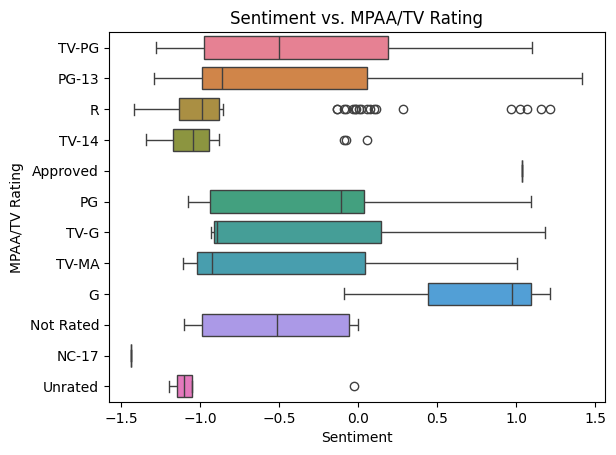

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

# Plotting the data on a box plot to show the average ranges (and outliers) of the sentiment analysis when broken down by MPAA/TV Rating
ax = sns.boxplot(data=unifiedDataFrame, x="sentiment", y="slimmed_rating", gap=.1, hue="slimmed_rating", legend=False)
_ = ax.set(title="Sentiment vs. MPAA/TV Rating", xlabel="Sentiment", ylabel="MPAA/TV Rating")